In [1]:
## regrid 0.1 degree to 0.25 degree
## conda activate geocat
## investigate regrid method for each variables

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

input_data = "/global/cscratch1/sd/wu59/FLEXTRKR/mcstracking_orig/20000601.0000_20010101.0000/mcstrack_20001020_0530.nc"
regrid_data = "./mcs-025_20001020_0530.nc"

ds = xr.open_dataset(input_data)
ds2 = xr.open_dataset(regrid_data)

print(ds)
print("======regrid to:======")
print(ds2)

<xarray.Dataset>
Dimensions:                        (time: 1, lat: 1200, lon: 3600)
Coordinates:
  * time                           (time) datetime64[ns] 2000-10-20T05:30:00....
  * lat                            (lat) float32 -59.95 -59.85 ... 59.85 59.95
  * lon                            (lon) float32 -179.9 -179.9 ... 179.9 179.9
Data variables:
    base_time                      (time) datetime64[ns] ...
    longitude                      (lat, lon) float32 ...
    latitude                       (lat, lon) float32 ...
    tb                             (time, lat, lon) float32 ...
    precipitation                  (time, lat, lon) float32 ...
    cloudtype                      (time, lat, lon) float64 ...
    cloudnumber                    (time, lat, lon) float64 ...
    split_tracknumbers             (time, lat, lon) float64 ...
    merge_tracknumbers             (time, lat, lon) float64 ...
    cloudtracknumber_nomergesplit  (time, lat, lon) float64 ...
    cloudtracknumber   

#  1. Quick plots of original 0.1-degree datasets

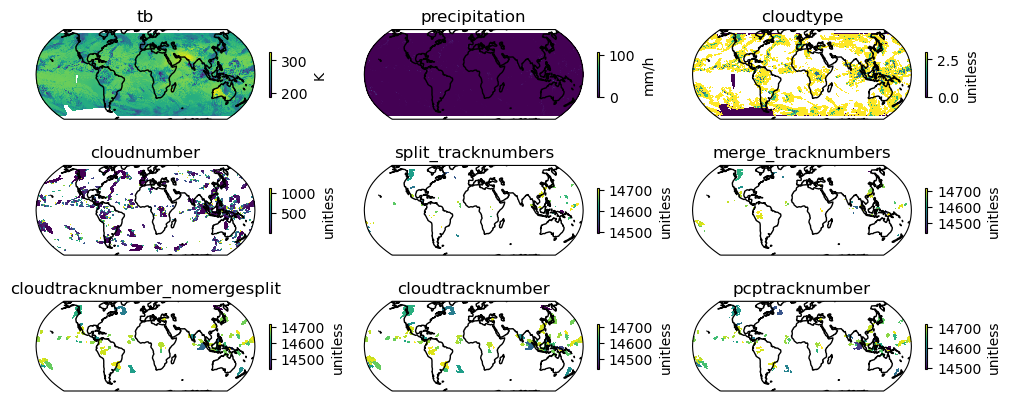

In [2]:
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.Robinson()},
                        figsize=(12,5))

axs=axs.flatten()

#Loop over all of the var
for i,var in enumerate(ds.data_vars):
    if i>=3:
        # Contour plot
        ds[var].plot(ax=axs[i-3], transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4, 'label':ds[var].units})
        axs[i-3].set_title(var)
        axs[i-3].coastlines()

# 2. Quick plots of regridded 0.25-degree datasets

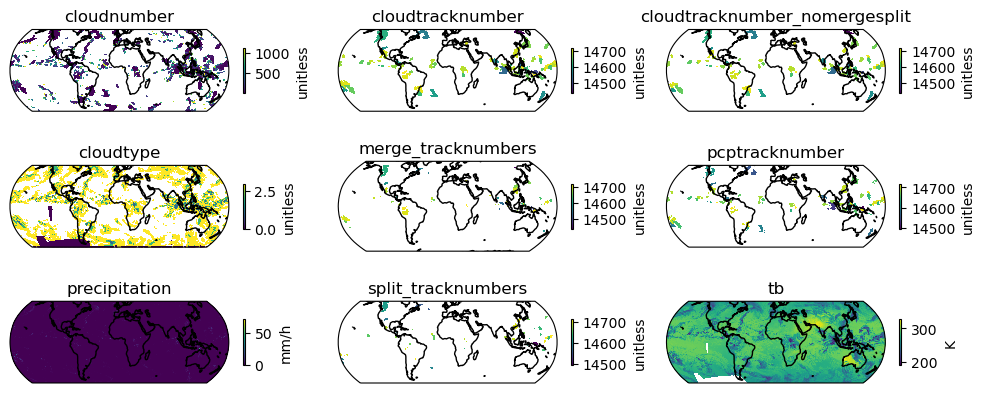

In [3]:
fig, axs = plt.subplots(nrows=3,ncols=3,
                        subplot_kw={'projection': ccrs.Robinson()},
                        figsize=(12,5))

axs=axs.flatten()

#Loop over all of the var
for i,var in enumerate(ds2.data_vars):
        # Contour plot
        ds2[var].plot(ax=axs[i], transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4, 'label':ds2[var].units})
        axs[i].set_title(var)
        axs[i].coastlines()

# 3. Examine precipiation remapping
## 3.1 Some precipiation values

In [4]:
print("0.1d ave precipitaiton at S edges", str(ds.precipitation[0,0,:].mean()))

0.1d ave precipitaiton at S edges <xarray.DataArray 'precipitation' ()>
array(0.06302798, dtype=float32)
Coordinates:
    time     datetime64[ns] 2000-10-20T05:30:00.000026880
    lat      float32 -59.95


In [5]:
print("0.25d ave precipitaiton at S edges", str(ds2.precipitation[0,-1,:].mean()))

0.25d ave precipitaiton at S edges <xarray.DataArray 'precipitation' ()>
array(0.06301469, dtype=float32)
Coordinates:
    lat      float64 -60.0
    time     datetime64[ns] 2000-10-20T05:30:00.000026880


In [6]:
print("0.1d max", str(ds.precipitation.max()))
print("0.25d max", str(ds2.precipitation.max()))

0.1d max <xarray.DataArray 'precipitation' ()>
array(107.81538, dtype=float32)
0.25d max <xarray.DataArray 'precipitation' ()>
array(70.5618, dtype=float32)


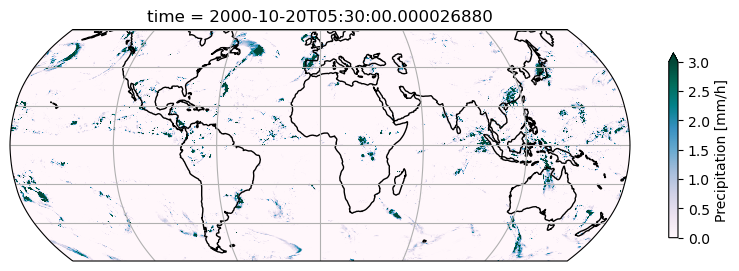

In [7]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Robinson())
ds2.precipitation.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=3, cbar_kwargs={'shrink': 0.4},cmap='PuBuGn')
ax.coastlines()
ax.gridlines()

# 4. regridded Tb

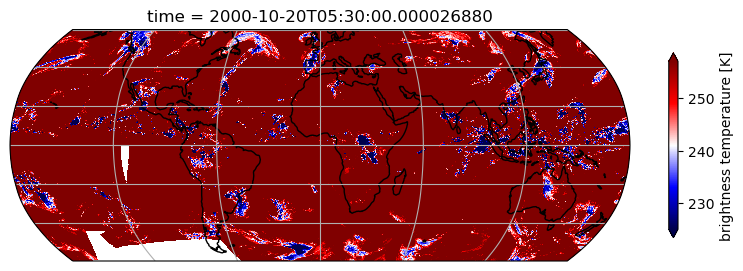

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Robinson())
ds2.tb.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=225, vmax=257, cbar_kwargs={'shrink': 0.4},cmap='seismic')
ax.coastlines()
ax.gridlines()

# 5. regridded cloudtracknumber

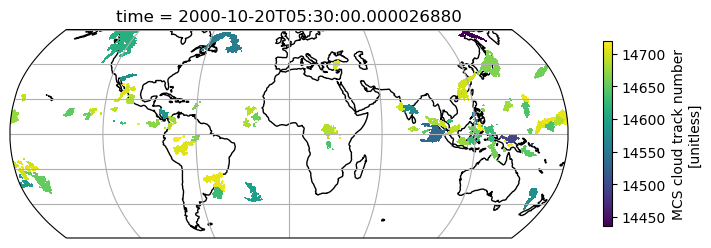

In [9]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
ds2.cloudtracknumber.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4})

# 6. regridded cloud types

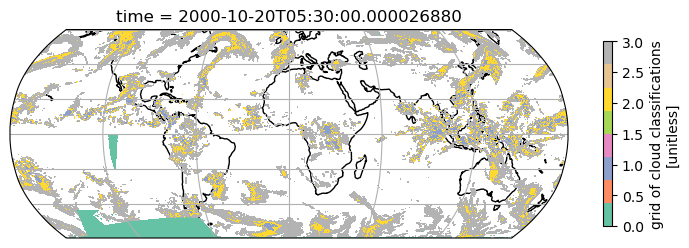

In [10]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
ds2.cloudtype.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4},cmap=plt.cm.Set2)